In [1]:
#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import defaultdict

In [3]:
# Load Data
df = pd.read_csv('glass.csv')

In [4]:
# EDA - Exploratory Data Analysis
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


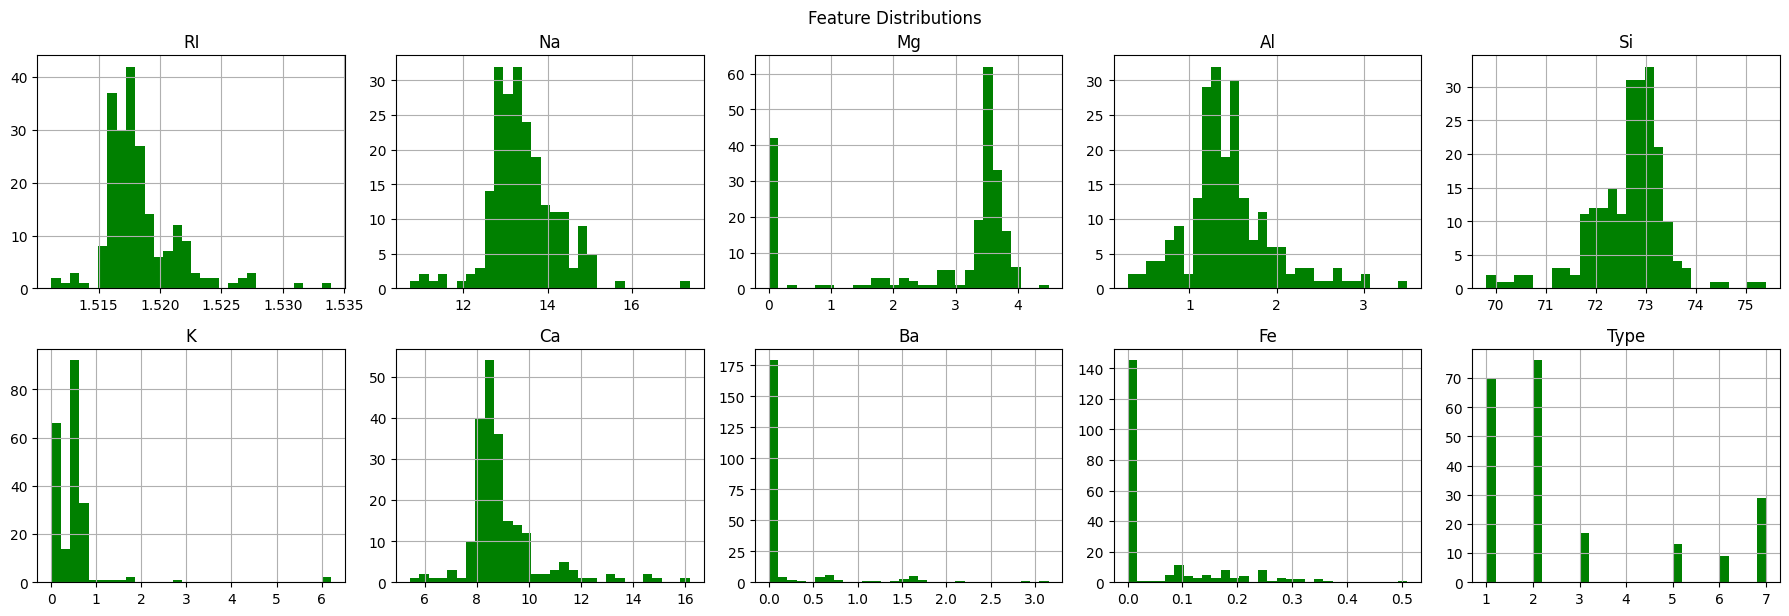

In [5]:
# Plot feature distributions
df.hist(bins=30, figsize=(18, 12), layout=(4, 5), color='green')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

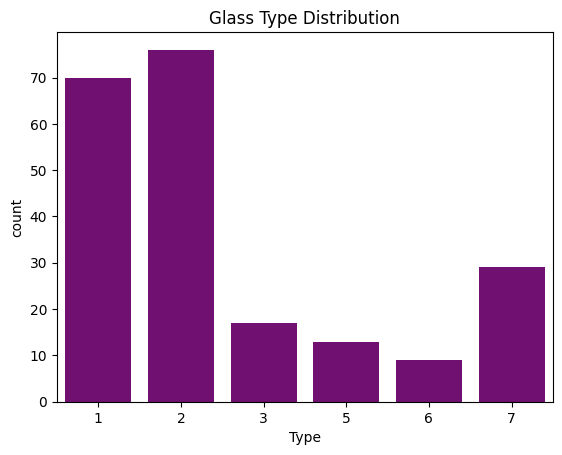

In [6]:
# Class distribution
sns.countplot(x='Type', data=df, color='purple')
plt.title('Glass Type Distribution')
plt.show()

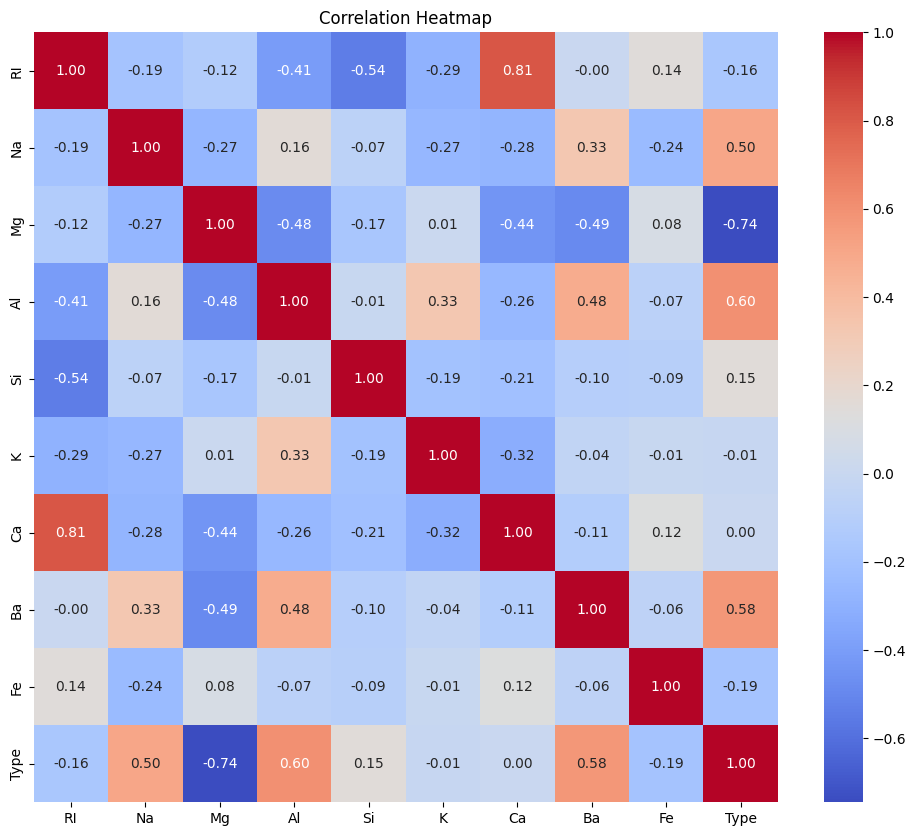

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
# Data Preprocessing
# Features and target
X = df.drop('Type', axis=1)
y = df['Type']

In [9]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [11]:
# Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(class_weight='balanced')
}

results = defaultdict(dict)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Store results
    results[name]['Accuracy'] = accuracy_score(y_test, y_pred)
    results[name]['Report'] = classification_report(y_test, y_pred)
    results[name]['Confusion Matrix'] = confusion_matrix(y_test, y_pred)

    print(f"\n=== {name} ===")
    print("Accuracy:", results[name]['Accuracy'])
    print("Classification Report:\n", results[name]['Report'])
    print("Confusion Matrix:\n", results[name]['Confusion Matrix'])


=== Logistic Regression ===
Accuracy: 0.5813953488372093
Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.57      0.64        14
           2       0.67      0.27      0.38        15
           3       0.20      0.67      0.31         3
           5       0.50      1.00      0.67         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.58        43
   macro avg       0.60      0.75      0.62        43
weighted avg       0.67      0.58      0.58        43

Confusion Matrix:
 [[8 2 4 0 0 0]
 [2 4 4 3 1 1]
 [1 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 6]]

=== Decision Tree ===
Accuracy: 0.6744186046511628
Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.71      0.77        14
           2       0.67      0.53      0.59        15
           3       0.43   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
# Feature Importance (for Tree Models)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

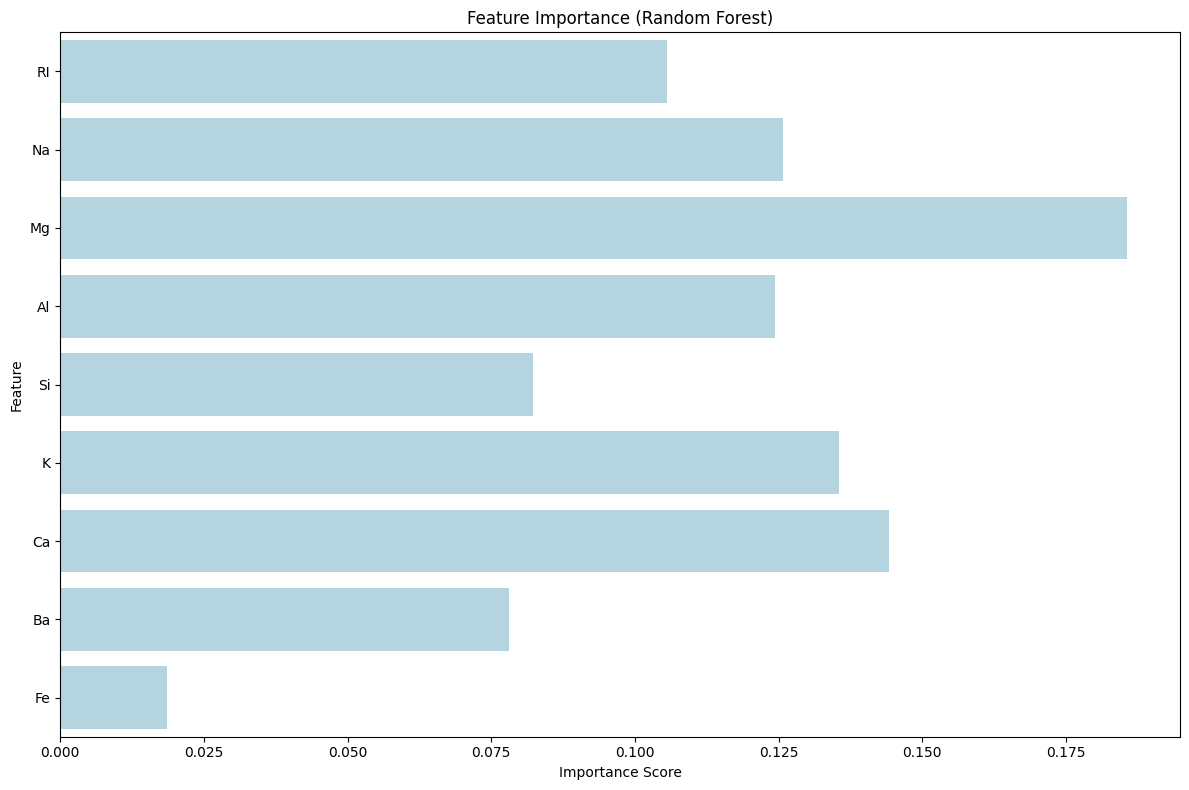

In [13]:
# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=X.columns, color='lightblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


 Model: Logistic Regression
Accuracy: 0.58

 Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.57      0.64        14
           2       0.67      0.27      0.38        15
           3       0.20      0.67      0.31         3
           5       0.50      1.00      0.67         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.58        43
   macro avg       0.60      0.75      0.62        43
weighted avg       0.67      0.58      0.58        43



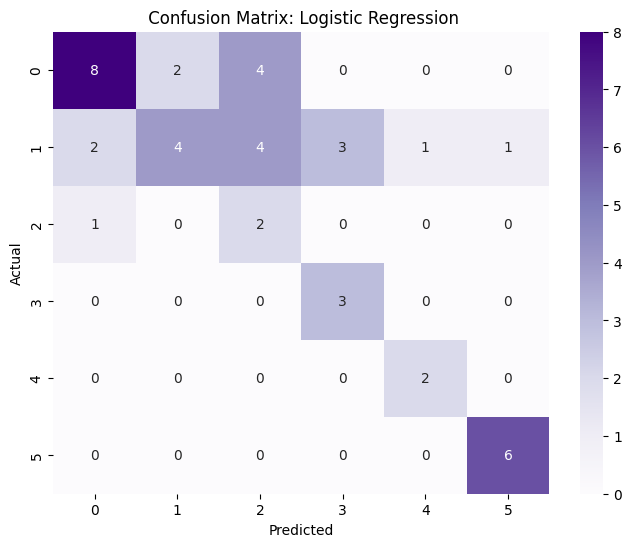


 Model: Decision Tree
Accuracy: 0.67

 Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.71      0.77        14
           2       0.67      0.53      0.59        15
           3       0.43      1.00      0.60         3
           5       0.50      0.67      0.57         3
           6       0.67      1.00      0.80         2
           7       0.80      0.67      0.73         6

    accuracy                           0.67        43
   macro avg       0.65      0.76      0.68        43
weighted avg       0.71      0.67      0.68        43



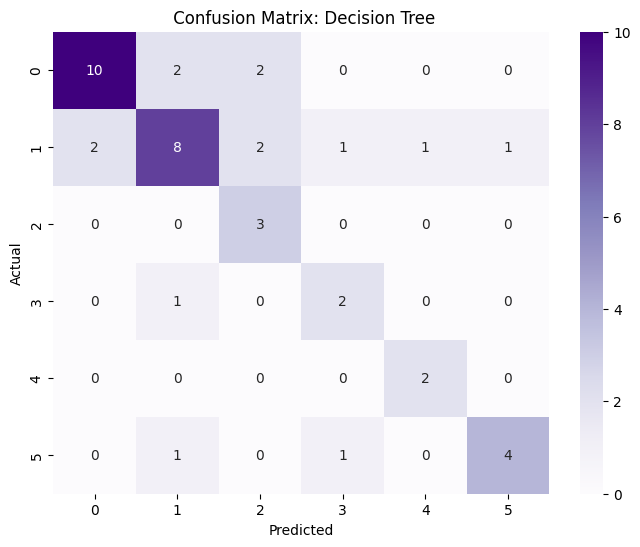


 Model: Random Forest
Accuracy: 0.74

 Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       0.77      0.67      0.71        15
           3       0.50      0.33      0.40         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.74        43
   macro avg       0.73      0.77      0.74        43
weighted avg       0.75      0.74      0.74        43



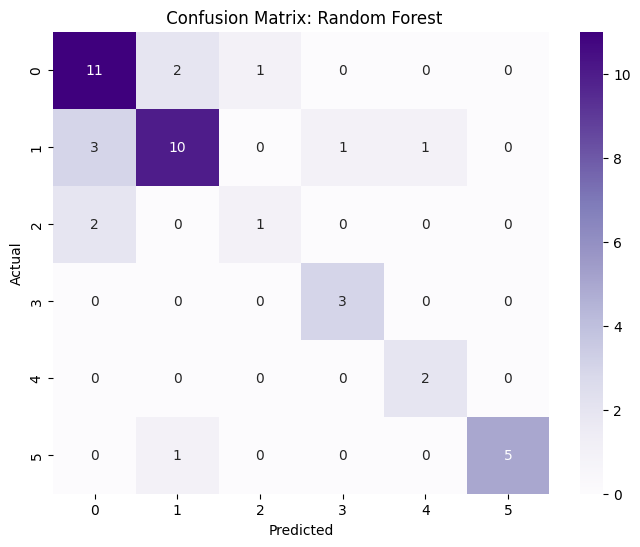


 Model: KNN
Accuracy: 0.70

 Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.65      0.73      0.69        15
           3       0.00      0.00      0.00         3
           5       0.50      0.67      0.57         3
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.70        43
   macro avg       0.62      0.59      0.59        43
weighted avg       0.66      0.70      0.67        43



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


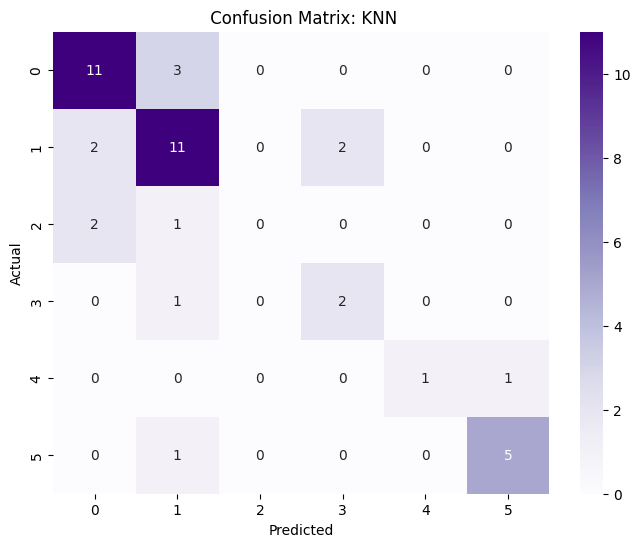


 Model: SVM
Accuracy: 0.70

 Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.64      0.69        14
           2       0.77      0.67      0.71        15
           3       0.17      0.33      0.22         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.86      1.00      0.92         6

    accuracy                           0.70        43
   macro avg       0.67      0.69      0.68        43
weighted avg       0.74      0.70      0.71        43



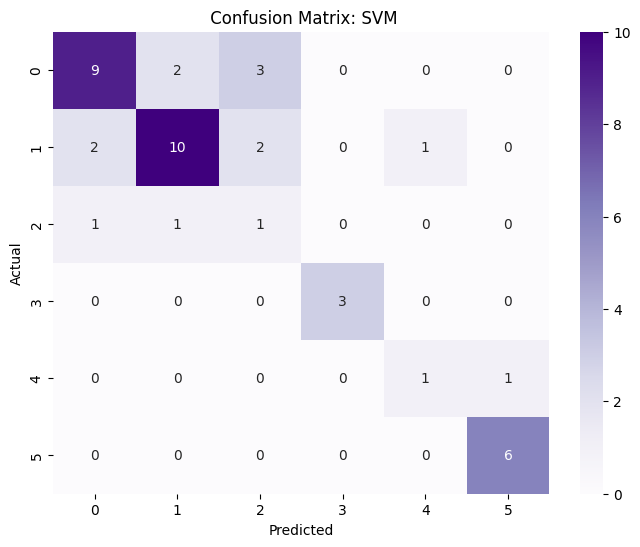

In [14]:
# Evaluate all models
for name, model in models.items():
    print(f"\n Model: {name}")
    y_pred = model.predict(X_test)

    # Scores
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")

    # Classification report
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
    plt.title(f" Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [15]:
# Reporting
# The best Performing Model
# Dictionary to store accuracy for each model
model_accuracies = {}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Find the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_score = model_accuracies[best_model_name]

print("\n Best Performing Model:")
print(f"Model: {best_model_name}")
print(f"Accuracy: {best_model_score:.4f}")

Logistic Regression Accuracy: 0.5814
Decision Tree Accuracy: 0.6744
Random Forest Accuracy: 0.7442
KNN Accuracy: 0.6977
SVM Accuracy: 0.6977

 Best Performing Model:
Model: Random Forest
Accuracy: 0.7442


In [16]:
# The best Performing Model is Random Forest

#Why it performed best:
# 1. Balanced bias-variance
from sklearn.model_selection import cross_val_score
import numpy as np

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# 5-fold cross-validation on training set
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Cross-Validation Scores: [0.71428571 0.70588235 0.82352941 0.85294118 0.70588235]
Mean Accuracy: 0.7605
Standard Deviation: 0.0642


In [17]:
# 2. Handles multiclass and class imbalance well
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       0.77      0.67      0.71        15
           3       0.50      0.33      0.40         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.74        43
   macro avg       0.73      0.77      0.74        43
weighted avg       0.75      0.74      0.74        43



Feature Importance:
Mg    0.185550
Ca    0.144214
K     0.135500
Na    0.125744
Al    0.124430
RI    0.105561
Si    0.082195
Ba    0.078174
Fe    0.018633
dtype: float64


/tmp/ipython-input-18-3881293607.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")


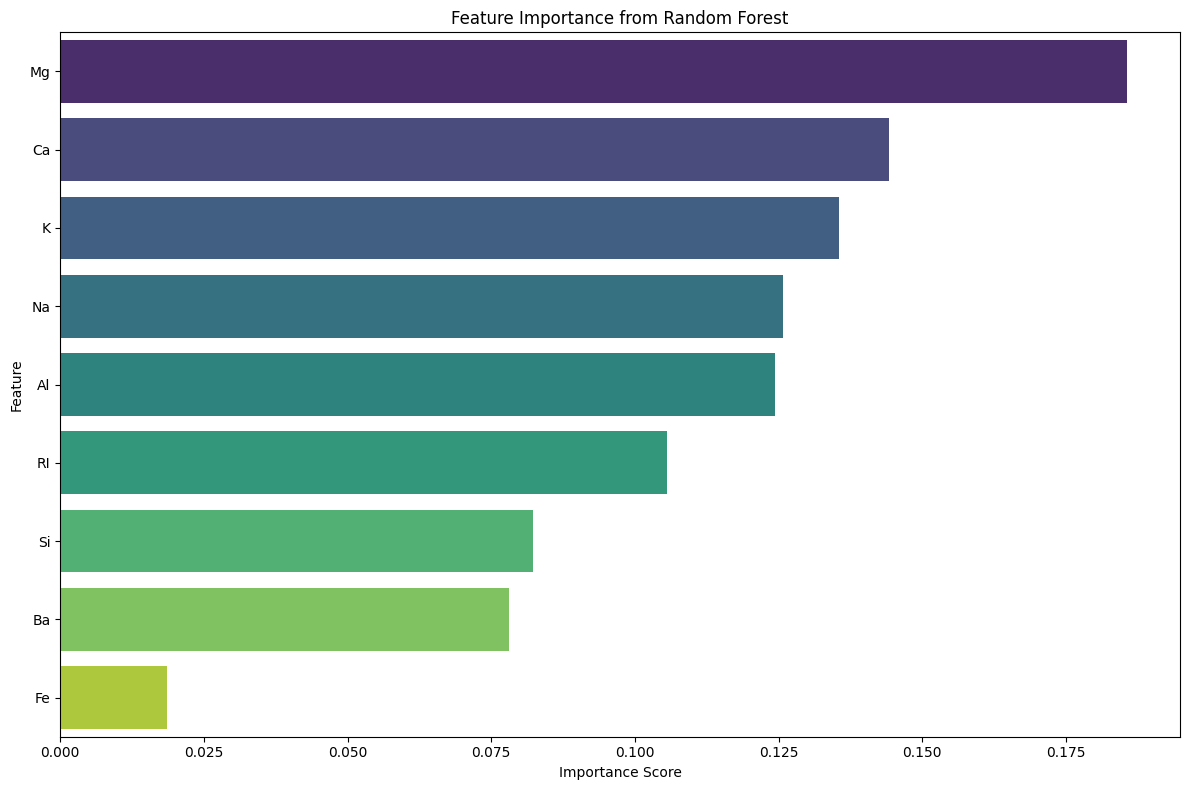

In [18]:
# 3. Automatically detects feature importance
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Feature Importance:")
print(feature_importance)

# Optional: visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [19]:
# Most Influential Features
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
Mg    0.185550
Ca    0.144214
K     0.135500
Na    0.125744
Al    0.124430
RI    0.105561
Si    0.082195
Ba    0.078174
Fe    0.018633
dtype: float64


In [20]:
# The Top Influencers:

# Mg (Magnesium) is the most important feature.

# Ca, K, and Na also play strong roles in classification.

/tmp/ipython-input-21-255203907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='pink')


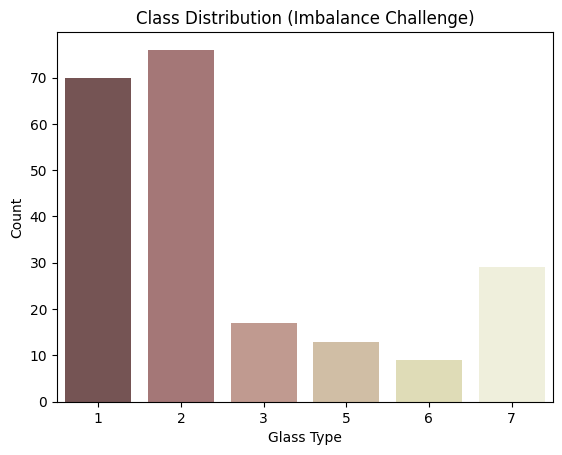

Class counts:
 Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [21]:
# Challenges Encountered
# 1. Challenge: Class Imbalance
# Visualize class distribution
sns.countplot(x='Type', data=df, palette='pink')
plt.title('Class Distribution (Imbalance Challenge)')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

# Count samples per class
print("Class counts:\n", df['Type'].value_counts())

In [22]:
# 2. Challenge: Small Dataset
# Check total dataset size
print(f"Total samples: {df.shape[0]}")
print(f"Total features: {df.shape[1] - 1}")

Total samples: 214
Total features: 9


Skewness per feature:
 K     6.551648
Ba    3.416425
Ca    2.047054
Fe    1.754327
RI    1.625431
Al    0.907290
Na    0.454181
Si   -0.730447
Mg   -1.152559
dtype: float64


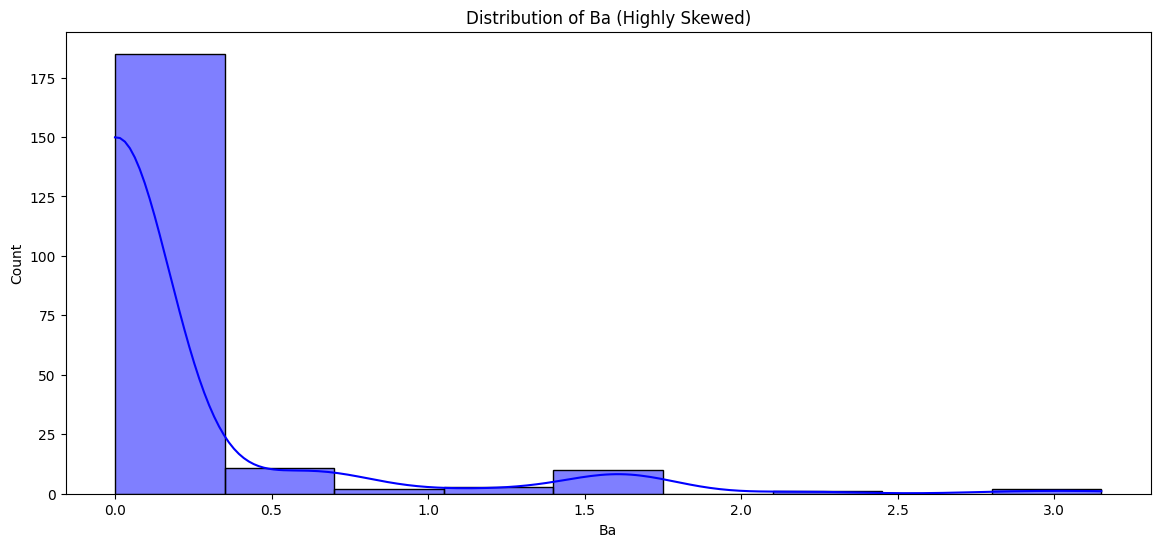

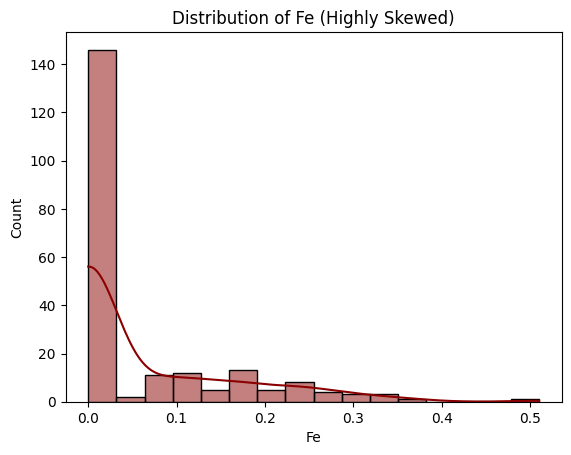

In [23]:
# 3. Challenge: Feature Skewness
# Check skewness for each feature
skewed_features = df.drop('Type', axis=1).skew().sort_values(ascending=False)
print("Skewness per feature:\n", skewed_features)

# Visualize top skewed features
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.histplot(df['Ba'], kde=True, color='blue')
plt.title('Distribution of Ba (Highly Skewed)')
plt.show()

sns.histplot(df['Fe'], kde=True, color='darkred')
plt.title('Distribution of Fe (Highly Skewed)')
plt.show()

In [24]:
# Challenges Encountered
# 1. Class Imbalance: Some types had very few samples, affecting model precision and recall.
# 2. Small Dataset: With only 214 samples, complex models could overfit.
# 3. Feature Skewness: Certain features had long tails (Ba, Fe, K) impacting distance-based models like KNN.